In [27]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore")


# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression  # For GLM
from sklearn.tree import DecisionTreeClassifier  # For CART
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Other ensemble methods
from sklearn.neural_network import MLPClassifier  # For neural network approaches
from xgboost import XGBClassifier  # For gradient boosting

# Data preprocessing and model evaluation
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler  # For data standardization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score

# Feature engineering
from sklearn.decomposition import PCA  # Principal Component Analysis

# Additional utilities
import shap  # for explanations of model predictions

# Neural network configuration
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100,5), max_iter=1000,random_state=1)


In [28]:
penske_df = pd.read_csv("DCM_DATA_LEHIGH.csv")

In [29]:
penske_df.head()

,ADJUSTED_SERVICE_DATE,ADJUSTED_SERVICE_DATE_FIRST,ANON_AREA_NAME,ANON_KMA,ANON_ORG_NAME,ANON_REGION_NAME,ANON_SSO,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,...,AVG_OT_HRS_PCT_CHG,AVG_REG_HRS_PCT_CHG,AVG_REG_AMT_PCT_CHG,AVG_OT_HRS_PCT_AMT,AVG_SICK_HRS_PCT_CHG,AVG_CHECK_GROSS_PCT_CHG,START_STD,END_STD,START_HOUR_AVG,END_HOUR_AVG
0,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,2,5,...,1.272958,-0.002512,0.019770,1.291758,0.000677,0.231738,1.057994,3.080846,13.943224,21.966902
1,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,4,...,-0.736184,-0.048999,-0.045310,-0.705442,0.000525,-0.223577,0.141075,1.239555,14.395151,22.910692
2,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,5,...,0.197296,-0.111123,-0.113450,0.194231,1.000467,-0.031891,1.026001,1.178765,14.010556,22.901173
3,2021-01-05,2021-01-05,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,TKAL97388736284318,1,0,1,...,-0.922222,0.116716,0.114581,-0.908165,0.250609,-0.032410,0.041086,2.151920,14.453333,21.888884
4,2020-12-21,2020-12-21,AREA_NAME 1,KMA 1,ORG_NAME 1,REGION_NAME 1,EOTY95708433810417,1,0,1,...,0.048944,0.001558,-0.000922,0.091704,0.000659,0.001645,0.339502,1.500960,14.514683,22.440265


In [30]:
penske_df["YEAR_MONTH"]

0        2021-05-01
1        2021-06-01
2        2021-07-01
3        2021-08-01
4        2021-01-01
            ...    
78051    2021-02-01
78052    2021-01-01
78053    2021-02-01
78054    2021-03-01
78055    2021-04-01
Name: YEAR_MONTH, Length: 78056, dtype: object

In [31]:
#DRop anon 
columns_to_remove = ['ADJUSTED_SERVICE_DATE', 'ADJUSTED_SERVICE_DATE_FIRST',"VOLUNTARY_INVOLUNTARY",'ANON_KMA', 'ANON_ORG_NAME', 'ANON_REGION_NAME']

# Removing the specified columns
penske_df.drop(columns=columns_to_remove, inplace=True)

In [32]:
penske_df.keys()

Index(['ANON_AREA_NAME', 'ANON_SSO', 'N_JOBS', 'N_WEEKEND_DAYS', 'N_WEEKS',
       'STATUS', 'YEAR_MONTH', 'TOTAL_HOURS', 'WORKED_HOURS', 'REG_HRS',
       'REG_AMT', 'OT_HRS', 'OT_AMT', 'VACATION_HRS', 'SICK_HRS',
       'NON_WORKED_HRS', 'BONUS', 'INCENTIVE', 'SHIFT_DIFF', 'LEAD',
       'CHECK_GROSS', 'AVG_TOTAL_HOURS', 'AVG_WORKED_HOURS', 'AVG_REG_HRS',
       'AVG_REG_AMT', 'AVG_OT_HRS', 'AVG_OT_AMT', 'AVG_SICK_HRS',
       'AVG_CHECK_GROSS', 'AVG_N_WEEKEND_DAYS', 'TIP',
       'AVG_TOTAL_HOURS_PCT_CHG', 'AVG_WORKED_HOURS_PCT_CHG',
       'AVG_OT_HRS_PCT_CHG', 'AVG_REG_HRS_PCT_CHG', 'AVG_REG_AMT_PCT_CHG',
       'AVG_OT_HRS_PCT_AMT', 'AVG_SICK_HRS_PCT_CHG', 'AVG_CHECK_GROSS_PCT_CHG',
       'START_STD', 'END_STD', 'START_HOUR_AVG', 'END_HOUR_AVG'],
      dtype='object')

In [33]:
agg_penske= penske_df



In [34]:
# Convert 'YEAR_MONTH' to datetime to ensure correct ordering
agg_penske['YEAR_MONTH'] = pd.to_datetime(agg_penske['YEAR_MONTH'])

area_dummies = pd.get_dummies(agg_penske['ANON_AREA_NAME'])


# Concatenate the dummy variables with the original DataFrame
agg_penske = pd.concat([agg_penske, area_dummies], axis=1)


In [35]:
agg_penske.drop('ANON_AREA_NAME', axis=1, inplace=True)

In [36]:
agg_penske.keys()

Index(['ANON_SSO', 'N_JOBS', 'N_WEEKEND_DAYS', 'N_WEEKS', 'STATUS',
       'YEAR_MONTH', 'TOTAL_HOURS', 'WORKED_HOURS', 'REG_HRS', 'REG_AMT',
       'OT_HRS', 'OT_AMT', 'VACATION_HRS', 'SICK_HRS', 'NON_WORKED_HRS',
       'BONUS', 'INCENTIVE', 'SHIFT_DIFF', 'LEAD', 'CHECK_GROSS',
       'AVG_TOTAL_HOURS', 'AVG_WORKED_HOURS', 'AVG_REG_HRS', 'AVG_REG_AMT',
       'AVG_OT_HRS', 'AVG_OT_AMT', 'AVG_SICK_HRS', 'AVG_CHECK_GROSS',
       'AVG_N_WEEKEND_DAYS', 'TIP', 'AVG_TOTAL_HOURS_PCT_CHG',
       'AVG_WORKED_HOURS_PCT_CHG', 'AVG_OT_HRS_PCT_CHG', 'AVG_REG_HRS_PCT_CHG',
       'AVG_REG_AMT_PCT_CHG', 'AVG_OT_HRS_PCT_AMT', 'AVG_SICK_HRS_PCT_CHG',
       'AVG_CHECK_GROSS_PCT_CHG', 'START_STD', 'END_STD', 'START_HOUR_AVG',
       'END_HOUR_AVG', 'AREA_NAME 1', 'AREA_NAME 10', 'AREA_NAME 11',
       'AREA_NAME 12', 'AREA_NAME 13', 'AREA_NAME 14', 'AREA_NAME 15',
       'AREA_NAME 16', 'AREA_NAME 17', 'AREA_NAME 18', 'AREA_NAME 2',
       'AREA_NAME 3', 'AREA_NAME 4', 'AREA_NAME 5', 'AREA_NAME 6',


In [37]:
import pandas as pd

# Define only numeric columns that should be averaged
numeric_columns_to_average = [
    'N_JOBS', 'N_WEEKEND_DAYS', 'N_WEEKS', 'TOTAL_HOURS', 'WORKED_HOURS', 'REG_HRS', 'REG_AMT',
    'OT_HRS', 'OT_AMT', 'VACATION_HRS', 'SICK_HRS', 'NON_WORKED_HRS', 'BONUS', 'INCENTIVE',
    'SHIFT_DIFF', 'LEAD', 'CHECK_GROSS', 'AVG_TOTAL_HOURS', 'AVG_WORKED_HOURS', 'AVG_REG_HRS',
    'AVG_REG_AMT', 'AVG_OT_HRS', 'AVG_OT_AMT', 'AVG_SICK_HRS', 'AVG_CHECK_GROSS', 'AVG_N_WEEKEND_DAYS',
    'TIP', 'AVG_TOTAL_HOURS_PCT_CHG', 'AVG_WORKED_HOURS_PCT_CHG', 'AVG_OT_HRS_PCT_CHG',
    'AVG_REG_HRS_PCT_CHG', 'AVG_REG_AMT_PCT_CHG', 'AVG_OT_HRS_PCT_AMT', 'AVG_SICK_HRS_PCT_CHG',
    'AVG_CHECK_GROSS_PCT_CHG', 'START_STD', 'END_STD', 'START_HOUR_AVG', 'END_HOUR_AVG'
]

# Group data by ANON_SSO and aggregate
aggregated_data = penske_df.groupby('ANON_SSO').agg({
    **{col: 'mean' for col in numeric_columns_to_average},  # Mean for numeric columns
    'STATUS': lambda x: 'T' if 'T' in x.values else 'E',  # Determine final status
    'YEAR_MONTH': 'max'  # Presumably you might want the latest date
})

# Add aggregation for dummy variables dynamically from the DataFrame
area_columns = [col for col in penske_df.columns if 'AREA_NAME' in col]
for col in area_columns:
    aggregated_data[col] = penske_df.groupby('ANON_SSO')[col].max()

# Reset index to make ANON_SSO a column again
aggregated_data.reset_index(inplace=True)

# Display the first few rows of the aggregated data to confirm changes
print(aggregated_data.head())



             ANON_SSO  N_JOBS  N_WEEKEND_DAYS   N_WEEKS  TOTAL_HOURS  \
0  AAAJ89553254615405     1.0        0.555556  3.555556   153.556579   
1  AAAR87421254694720     1.0        2.800000  3.400000   137.999198   
2  AAFU06075860661712     1.0        2.000000  2.000000    48.344720   
3  AAGC68875936627700     1.0        0.000000  1.500000    48.546837   
4  AAGQ42772589696541     2.0        0.125000  3.250000   121.798855   

   WORKED_HOURS     REG_HRS      REG_AMT     OT_HRS      OT_AMT  ...  \
0    147.525499  125.208961  2241.285012  22.325482  629.489228  ...   
1    137.917750  132.988651  2269.375645   5.056278  134.784998  ...   
2     48.510103   48.097886   899.674977   0.981199   20.298230  ...   
3     44.603664   45.861886   642.185384   1.056272   21.175121  ...   
4    105.028875   96.261544  1687.078953   7.901602  205.598930  ...   

   AVG_OT_HRS_PCT_AMT  AVG_SICK_HRS_PCT_CHG  AVG_CHECK_GROSS_PCT_CHG  \
0            1.112638              0.222697                 0.

In [38]:
aggregated_data.head()

,ANON_SSO,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,TOTAL_HOURS,WORKED_HOURS,REG_HRS,REG_AMT,OT_HRS,OT_AMT,...,AVG_OT_HRS_PCT_AMT,AVG_SICK_HRS_PCT_CHG,AVG_CHECK_GROSS_PCT_CHG,START_STD,END_STD,START_HOUR_AVG,END_HOUR_AVG,STATUS,YEAR_MONTH,ANON_AREA_NAME
0,AAAJ89553254615405,1.0,0.555556,3.555556,153.556579,147.525499,125.208961,2241.285012,22.325482,629.489228,...,1.112638,0.222697,0.034878,0.865315,2.203626,13.647057,22.367071,T,2021-04-01,AREA_NAME 1
1,AAAR87421254694720,1.0,2.800000,3.400000,137.999198,137.917750,132.988651,2269.375645,5.056278,134.784998,...,4.396407,0.000490,-0.026033,1.408717,4.878294,10.460732,18.771861,T,2021-10-01,AREA_NAME 2
2,AAFU06075860661712,1.0,2.000000,2.000000,48.344720,48.510103,48.097886,899.674977,0.981199,20.298230,...,0.042108,0.000358,0.001656,0.485736,1.449614,7.717593,18.595568,T,2022-10-01,AREA_NAME 1
3,AAGC68875936627700,1.0,0.000000,1.500000,48.546837,44.603664,45.861886,642.185384,1.056272,21.175121,...,-0.442812,0.000384,-0.398203,0.069830,0.079100,15.712102,24.422391,T,2021-04-01,AREA_NAME 1
4,AAGQ42772589696541,2.0,0.125000,3.250000,121.798855,105.028875,96.261544,1687.078953,7.901602,205.598930,...,-0.195021,0.000473,2.752181,1.357113,3.858037,16.500071,10.949480,T,2022-09-01,AREA_NAME 6


In [39]:
anon_area=pd.get_dummies(aggregated_data['ANON_AREA_NAME'])

In [40]:
aggregated_data.drop('ANON_AREA_NAME', axis=1, inplace=True)

In [41]:

aggregated_data = pd.concat([aggregated_data, anon_area], axis=1)

In [42]:
aggregated_data.head()

,ANON_SSO,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,TOTAL_HOURS,WORKED_HOURS,REG_HRS,REG_AMT,OT_HRS,OT_AMT,...,AREA_NAME 17,AREA_NAME 18,AREA_NAME 2,AREA_NAME 3,AREA_NAME 4,AREA_NAME 5,AREA_NAME 6,AREA_NAME 7,AREA_NAME 8,AREA_NAME 9
0,AAAJ89553254615405,1.0,0.555556,3.555556,153.556579,147.525499,125.208961,2241.285012,22.325482,629.489228,...,0,0,0,0,0,0,0,0,0,0
1,AAAR87421254694720,1.0,2.800000,3.400000,137.999198,137.917750,132.988651,2269.375645,5.056278,134.784998,...,0,0,1,0,0,0,0,0,0,0
2,AAFU06075860661712,1.0,2.000000,2.000000,48.344720,48.510103,48.097886,899.674977,0.981199,20.298230,...,0,0,0,0,0,0,0,0,0,0
3,AAGC68875936627700,1.0,0.000000,1.500000,48.546837,44.603664,45.861886,642.185384,1.056272,21.175121,...,0,0,0,0,0,0,0,0,0,0
4,AAGQ42772589696541,2.0,0.125000,3.250000,121.798855,105.028875,96.261544,1687.078953,7.901602,205.598930,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# Normalize the STATUS values to upper case and remove any leading/trailing whitespace
aggregated_data['STATUS'] = aggregated_data['STATUS'].str.upper().str.strip()
print(aggregated_data['STATUS'].unique())




['T' 'E']


In [44]:
# Apply the np.where function again after normalization
aggregated_data['STATUS'] = np.where(aggregated_data['STATUS'] == 'T', 1, 0)



In [45]:
# Verify the transformation
print(aggregated_data['STATUS'].describe())
print(aggregated_data['STATUS'].unique())
print(aggregated_data['STATUS'].value_counts())


count    9369.000000
mean        0.617569
std         0.486007
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: STATUS, dtype: float64
[1 0]
1    5786
0    3583
Name: STATUS, dtype: int64


In [46]:
aggregated_data.keys()

Index(['ANON_SSO', 'N_JOBS', 'N_WEEKEND_DAYS', 'N_WEEKS', 'TOTAL_HOURS',
       'WORKED_HOURS', 'REG_HRS', 'REG_AMT', 'OT_HRS', 'OT_AMT',
       'VACATION_HRS', 'SICK_HRS', 'NON_WORKED_HRS', 'BONUS', 'INCENTIVE',
       'SHIFT_DIFF', 'LEAD', 'CHECK_GROSS', 'AVG_TOTAL_HOURS',
       'AVG_WORKED_HOURS', 'AVG_REG_HRS', 'AVG_REG_AMT', 'AVG_OT_HRS',
       'AVG_OT_AMT', 'AVG_SICK_HRS', 'AVG_CHECK_GROSS', 'AVG_N_WEEKEND_DAYS',
       'TIP', 'AVG_TOTAL_HOURS_PCT_CHG', 'AVG_WORKED_HOURS_PCT_CHG',
       'AVG_OT_HRS_PCT_CHG', 'AVG_REG_HRS_PCT_CHG', 'AVG_REG_AMT_PCT_CHG',
       'AVG_OT_HRS_PCT_AMT', 'AVG_SICK_HRS_PCT_CHG', 'AVG_CHECK_GROSS_PCT_CHG',
       'START_STD', 'END_STD', 'START_HOUR_AVG', 'END_HOUR_AVG', 'STATUS',
       'YEAR_MONTH', 'AREA_NAME 1', 'AREA_NAME 10', 'AREA_NAME 11',
       'AREA_NAME 12', 'AREA_NAME 13', 'AREA_NAME 14', 'AREA_NAME 15',
       'AREA_NAME 16', 'AREA_NAME 17', 'AREA_NAME 18', 'AREA_NAME 2',
       'AREA_NAME 3', 'AREA_NAME 4', 'AREA_NAME 5', 'AREA_NAME 6',


In [11]:
#aggregated_data.to_csv('/Users/amelchristy/Documents/Penske/aggregated_data.csv', index=False)

In [79]:
penske_df=aggregated_data

In [80]:
len(penske_df)


9369

In [81]:
penske_df.describe()


,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,TOTAL_HOURS,WORKED_HOURS,REG_HRS,REG_AMT,OT_HRS,OT_AMT,VACATION_HRS,...,AREA_NAME 17,AREA_NAME 18,AREA_NAME 2,AREA_NAME 3,AREA_NAME 4,AREA_NAME 5,AREA_NAME 6,AREA_NAME 7,AREA_NAME 8,AREA_NAME 9
count,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,...,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000
mean,1.075141,2.231145,3.127669,125.878784,117.409700,104.545898,1886.430497,12.866962,353.903574,3.345408,...,0.000107,0.000107,0.377735,0.111752,0.063828,0.025189,0.115060,0.026790,0.025296,0.004269
std,0.420582,2.238376,1.135139,60.764221,57.567276,47.537057,870.236687,14.958050,417.167453,5.345498,...,0.010331,0.010331,0.484847,0.315077,0.244458,0.156709,0.319112,0.161479,0.157032,0.065204
min,1.000000,0.000000,1.000000,6.099810,3.783717,2.685170,64.936490,0.404539,11.136623,0.122074,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.233333,2.000000,72.096021,67.451864,64.088844,1161.627542,0.964123,26.401406,0.209743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.500000,3.538462,135.801880,126.725977,116.976864,2049.346087,7.424528,202.271094,0.277569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.750000,4.064516,175.577131,163.435336,146.503964,2597.524261,19.714630,536.424491,5.123319,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,8.750000,5.571429,315.299768,300.883491,225.746169,4083.398576,143.564256,3671.399907,82.734603,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
penske_df.keys()

Index(['ANON_SSO', 'N_JOBS', 'N_WEEKEND_DAYS', 'N_WEEKS', 'TOTAL_HOURS',
       'WORKED_HOURS', 'REG_HRS', 'REG_AMT', 'OT_HRS', 'OT_AMT',
       'VACATION_HRS', 'SICK_HRS', 'NON_WORKED_HRS', 'BONUS', 'INCENTIVE',
       'SHIFT_DIFF', 'LEAD', 'CHECK_GROSS', 'AVG_TOTAL_HOURS',
       'AVG_WORKED_HOURS', 'AVG_REG_HRS', 'AVG_REG_AMT', 'AVG_OT_HRS',
       'AVG_OT_AMT', 'AVG_SICK_HRS', 'AVG_CHECK_GROSS', 'AVG_N_WEEKEND_DAYS',
       'TIP', 'AVG_TOTAL_HOURS_PCT_CHG', 'AVG_WORKED_HOURS_PCT_CHG',
       'AVG_OT_HRS_PCT_CHG', 'AVG_REG_HRS_PCT_CHG', 'AVG_REG_AMT_PCT_CHG',
       'AVG_OT_HRS_PCT_AMT', 'AVG_SICK_HRS_PCT_CHG', 'AVG_CHECK_GROSS_PCT_CHG',
       'START_STD', 'END_STD', 'START_HOUR_AVG', 'END_HOUR_AVG', 'STATUS',
       'YEAR_MONTH', 'AREA_NAME 1', 'AREA_NAME 10', 'AREA_NAME 11',
       'AREA_NAME 12', 'AREA_NAME 13', 'AREA_NAME 14', 'AREA_NAME 15',
       'AREA_NAME 16', 'AREA_NAME 17', 'AREA_NAME 18', 'AREA_NAME 2',
       'AREA_NAME 3', 'AREA_NAME 4', 'AREA_NAME 5', 'AREA_NAME 6',


In [83]:
# Correct the dropping of columns
penske_df = penske_df.drop(columns=['YEAR_MONTH', 'AREA_NAME 1', 'AREA_NAME 10', 'AREA_NAME 11',
'AREA_NAME 12', 'AREA_NAME 13', 'AREA_NAME 14', 'AREA_NAME 15',
'AREA_NAME 16', 'AREA_NAME 17', 'AREA_NAME 18', 'AREA_NAME 2',
'AREA_NAME 3', 'AREA_NAME 4', 'AREA_NAME 5', 'AREA_NAME 6',
'AREA_NAME 7', 'AREA_NAME 8', 'AREA_NAME 9','ANON_SSO'])



In [96]:
len(penske_df.keys())

40

In [86]:
penske_df

,N_JOBS,N_WEEKEND_DAYS,N_WEEKS,TOTAL_HOURS,WORKED_HOURS,REG_HRS,REG_AMT,OT_HRS,OT_AMT,VACATION_HRS,...,AVG_REG_HRS_PCT_CHG,AVG_REG_AMT_PCT_CHG,AVG_OT_HRS_PCT_AMT,AVG_SICK_HRS_PCT_CHG,AVG_CHECK_GROSS_PCT_CHG,START_STD,END_STD,START_HOUR_AVG,END_HOUR_AVG,STATUS
0,1.0,0.555556,3.555556,153.556579,147.525499,125.208961,2241.285012,22.325482,629.489228,0.204726,...,0.009344,0.014366,1.112638,0.222697,0.034878,0.865315,2.203626,13.647057,22.367071,1
1,1.0,2.800000,3.400000,137.999198,137.917750,132.988651,2269.375645,5.056278,134.784998,0.171223,...,-0.026250,-0.028124,4.396407,0.000490,-0.026033,1.408717,4.878294,10.460732,18.771861,1
2,1.0,2.000000,2.000000,48.344720,48.510103,48.097886,899.674977,0.981199,20.298230,0.169761,...,0.001483,-0.000846,0.042108,0.000358,0.001656,0.485736,1.449614,7.717593,18.595568,1
3,1.0,0.000000,1.500000,48.546837,44.603664,45.861886,642.185384,1.056272,21.175121,0.224162,...,-0.386550,-0.388685,-0.442812,0.000384,-0.398203,0.069830,0.079100,15.712102,24.422391,1
4,2.0,0.125000,3.250000,121.798855,105.028875,96.261544,1687.078953,7.901602,205.598930,5.216757,...,2.341804,2.461744,-0.195021,0.000473,2.752181,1.357113,3.858037,16.500071,10.949480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,1.0,0.000000,1.500000,25.994909,17.778925,15.896571,302.477072,0.623225,14.724717,0.179069,...,0.147322,0.145551,0.063213,0.000518,-0.184725,0.129540,0.623508,15.500296,20.601585,1
9365,1.0,1.000000,1.500000,48.823917,47.652492,48.389667,868.655025,0.533209,17.531715,0.202853,...,0.070266,0.068301,0.063210,0.000511,0.085779,1.217728,1.226768,12.330870,20.944887,1
9366,1.0,0.000000,3.750000,148.213817,143.214726,141.508480,2573.231974,2.766641,73.039959,2.224514,...,-0.033205,-0.035278,0.541288,0.000500,-0.014668,0.036535,0.240388,7.439141,16.093837,0
9367,1.0,2.000000,2.000000,88.562560,86.213947,85.268716,1439.013570,1.559331,36.844271,0.222967,...,0.001381,-0.000816,0.070412,0.000442,0.001106,0.202932,0.909910,13.995379,22.860160,1


In [87]:
#Building D matrice for XGBoost
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = penske_df.drop('STATUS', axis=1), penske_df[['STATUS']]

In [129]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [130]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [131]:


# Initialize the models
algos = [
    GradientBoostingClassifier(random_state=1),
    XGBClassifier(random_state=1),
    MLPClassifier(activation='relu', hidden_layer_sizes=(50,18,1), max_iter=500, random_state=1)
]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []
for algo in algos:
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    metrics = {
        'Algorithm': algo.__class__.__name__,
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    results.append(metrics)

# Convert results into a DataFrame for nicer display
results_df = pd.DataFrame(results)
print(results_df)


                    Algorithm  Balanced Accuracy  Precision    Recall  \
0  GradientBoostingClassifier           0.857672   0.893532  0.890982   
1               XGBClassifier           0.873108   0.905034  0.902968   
2               MLPClassifier           0.855936   0.920836  0.829909   

   F1 Score  
0  0.892255  
1  0.904000  
2  0.873011  


In [125]:
###PCA
# Initializing PCA with 5 components and fitting it to the data for dimensionality reduction
#pca = PCA(n_components=5)
#pca.fit(X)                                 # Fitting PCA to the feature matrix X
#pca2 = pca.transform(X)                    # Transforming the data to a lower-dimensional space using PCA
#pca2                         

array([[  760.84556591,   108.02744594,   -43.07100733,  -102.49896795,
          -15.45974356],
       [  298.84959703,  -362.20072001,   -55.88137515,   123.34023261,
          -76.42827069],
       [-1943.32637736,    11.18983034,    35.98272937,   -36.23859298,
          -19.80706001],
       ...,
       [  450.07092347,  -626.07389185,  -143.78421011,   -36.72288987,
          -76.83723872],
       [-1053.35017521,  -112.77728385,  -187.56923228,   170.76481219,
          -93.11712639],
       [ 1300.55836495,    98.69305905,  -153.25612485,   -70.91012357,
         -132.87459815]])

In [126]:
# Creating a new DataFrame 'df_pca' from the PCA-transformed data 'pca2' with named columns
#df_pca = pd.DataFrame(pca2, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'])
#df_pca  # Displaying the new DataFrame with PCA components

,pca_1,pca_2,pca_3,pca_4,pca_5
0,760.845566,108.027446,-43.071007,-102.498968,-15.459744
1,298.849597,-362.200720,-55.881375,123.340233,-76.428271
2,-1943.326377,11.189830,35.982729,-36.238593,-19.807060
3,-2290.491931,108.101176,158.784566,-78.044360,-8.417881
4,-397.387841,-71.196239,105.495777,1.772064,13.865494
...,...,...,...,...,...
9364,-2681.592780,259.854891,294.837093,-87.414407,61.183451
9365,-1892.022049,76.712381,-103.675406,77.355797,-3.882880
9366,450.070923,-626.073892,-143.784210,-36.722890,-76.837239
9367,-1053.350175,-112.777284,-187.569232,170.764812,-93.117126


In [127]:
##PCA
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, stratify=y)
pca_features= []

for algo in algos:
  algo.fit(X_train, y_train)
  y_test_pred = algo.predict(X_test)
  print(type(algo).__name__)
  print(accuracy_score(y_test, y_test_pred))
  balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
  print("Balanced Accuracy:", balanced_accuracy)
  print(confusion_matrix(y_test, y_test_pred))
  pca_features.append(balanced_accuracy)
  print()


GradientBoostingClassifier
0.807897545357524
Balanced Accuracy: 0.7916948880077161
[[ 777  298]
 [ 242 1494]]

XGBClassifier
0.7975809320526503
Balanced Accuracy: 0.7819255706783839
[[ 769  306]
 [ 263 1473]]

MLPClassifier
0.7506225542511562
Balanced Accuracy: 0.7586062587075341
[[ 852  223]
 [ 478 1258]]



In [121]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score
rfecv = RFECV(estimator=XGBClassifier(), step=1, cv=3, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Summarize the selection of the attributes
print("Optimal number of features: %d" % rfecv.n_features_)


Optimal number of features: 37


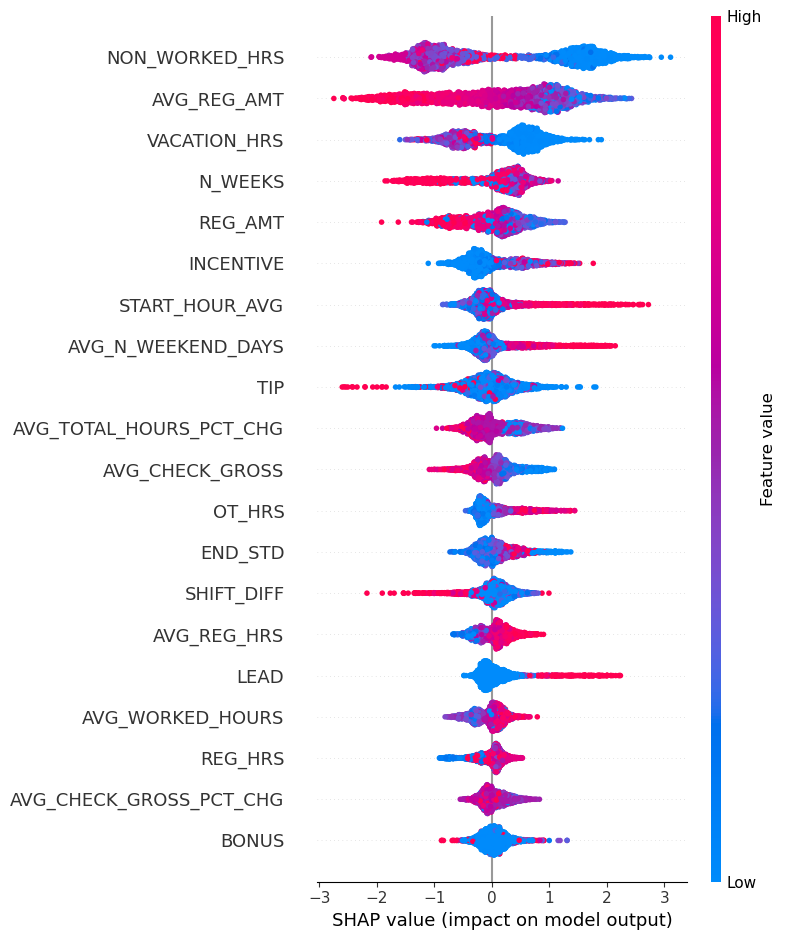

In [134]:
import xgboost as xgb
import shap

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Visualize the feature importance
shap.summary_plot(shap_values, X_test)



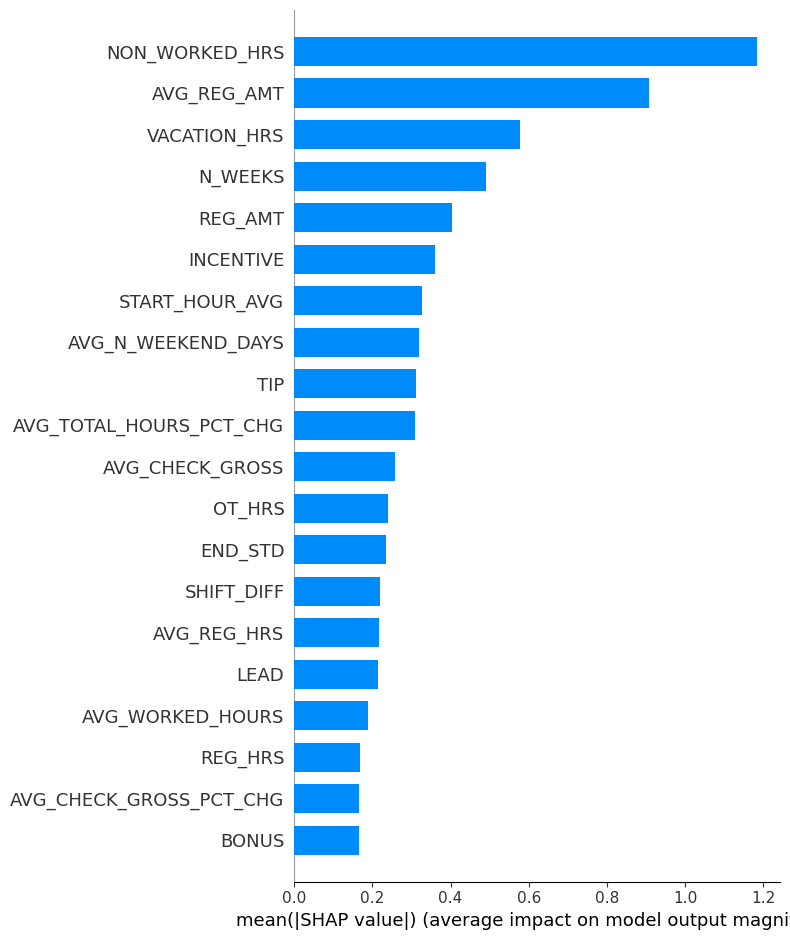

In [138]:

# Visualize the feature importance for the test set
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [139]:
# Calculate the mean absolute SHAP values for each feature
shap_sum = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame(list(zip(X_test.columns, shap_sum)), columns=['col_name', 'shap_importance'])
feature_importance.sort_values('shap_importance', ascending=False, inplace=True)

# Display the most important features
print(feature_importance)


                    col_name  shap_importance
11            NON_WORKED_HRS         1.183218
20               AVG_REG_AMT         0.907129
9               VACATION_HRS         0.577347
2                    N_WEEKS         0.490217
6                    REG_AMT         0.402802
13                 INCENTIVE         0.360928
37            START_HOUR_AVG         0.327405
25        AVG_N_WEEKEND_DAYS         0.319791
26                       TIP         0.312215
27   AVG_TOTAL_HOURS_PCT_CHG         0.308641
24           AVG_CHECK_GROSS         0.258152
7                     OT_HRS         0.239258
36                   END_STD         0.233969
14                SHIFT_DIFF         0.220594
19               AVG_REG_HRS         0.217089
15                      LEAD         0.215031
18          AVG_WORKED_HOURS         0.189198
5                    REG_HRS         0.167792
34   AVG_CHECK_GROSS_PCT_CHG         0.165962
12                     BONUS         0.165002
30       AVG_REG_HRS_PCT_CHG      

In [185]:
# Select the top N important features (for example, top 10)
top_features = feature_importance.head(37)['col_name'].tolist()

# Filter training and testing sets to include only these top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain the XGBoost model on the selected features
xgb_model_top = xgb.XGBClassifier(random_state=1)
xgb_model_top.fit(X_train_top, y_train)

# Predictions on the test set
y_pred_top = xgb_model_top.predict(X_test_top)

# Evaluate the new model's performance
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_top))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_top))


Accuracy: 0.8836712913553896
Balanced Accuracy: 0.8767972175870231


In [186]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=1)

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit grid search
grid_search.fit(X_train_top, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best score: 0.889295516925892


In [ ]:
#https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.